<a href="https://colab.research.google.com/github/jodoldar/PracticasRNA/blob/master/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential

from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import GaussianNoise as GN
from keras.layers import Reshape
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GlobalAveragePooling2D, AveragePooling2D

from keras.optimizers import SGD
import keras.backend as K

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler as LRS
from keras.callbacks import ReduceLROnPlateau

from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 150

In [0]:
#### LOAD AND TRANSFORM
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 43s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
## CIFAR MODEL
model = Sequential()

model.add(Conv2D(96, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Conv2D(96, kernel_size=(3,3), padding='same'))
model.add(BN())
model.add(GN(0.25))



model.add(Conv2D(96, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Dropout(0.45))



model.add(Conv2D(192, kernel_size=(3,3), padding='same'))
model.add(BN())
model.add(GN(0.25))
model.add(Activation('relu'))

model.add(Conv2D(192, kernel_size=(3,3), padding='same'))
model.add(BN())
model.add(GN(0.25))
model.add(Activation('relu'))


model.add(Conv2D(192, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Dropout(0.25))


model.add(Conv2D(192, kernel_size=(3,3), padding='same'))
model.add(BN())
model.add(GN(0.25))
model.add(Activation('relu'))

model.add(Conv2D(192, kernel_size=(1,1), padding='same'))
model.add(BN())
model.add(GN(0.25))
model.add(Activation('relu'))

model.add(Conv2D(10, kernel_size=(1,1), padding='same'))
model.add(BN())
model.add(GN(0.25))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(6,6)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 32, 32, 96)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3,
                                           verbose=1, factor=0.5,
                                           min_lr=0.0001)

In [0]:
## DATA AUGMENTATION FOR CIFAR-10
datagen = ImageDataGenerator(
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=False)

In [0]:
sgd=SGD(lr=0.25, decay=1e-3, momentum=0.9)

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [9]:
datagen.fit(x_train)
history=model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[learning_rate_reduction],
                            verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
390/390 [==============================] - 78s 200ms/step - loss: 1.7576 - acc: 0.3293 - val_loss: 1.7629 - val_acc: 0.3593
Epoch 2/150
390/390 [==============================] - 74s 189ms/step - loss: 1.4082 - acc: 0.4780 - val_loss: 1.5089 - val_acc: 0.4952
Epoch 3/150
390/390 [==============================] - 73s 187ms/step - loss: 1.1897 - acc: 0.5691 - val_loss: 1.2231 - val_acc: 0.5806
Epoch 4/150
390/390 [==============================] - 73s 186ms/step - loss: 1.0534 - acc: 0.6212 - val_loss: 1.5288 - val_acc: 0.5508
Epoch 5/150
390/390 [==============================] - 73s 186ms/step - loss: 0.9435 - acc: 0.6626 - val_loss: 0.9667 - val_acc: 0.6623
Epoch 6/150
390/390 [==============================] - 73s 186ms/step - loss: 0.8606 - acc: 0.6943 - val_loss: 1.1286 - val_acc: 0.6384
Epoch 7/150
390/390 [==============================] - 73s 187ms/step - loss: 0.7944 - acc: 0.7188 - val_loss: 0.9276 - val_acc: 0.6987


In [13]:
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 468us/step
Test loss: 0.47792916111946104
Test accuracy: 0.8507


In [0]:
import matplotlib.pyplot as plt #for plotting
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

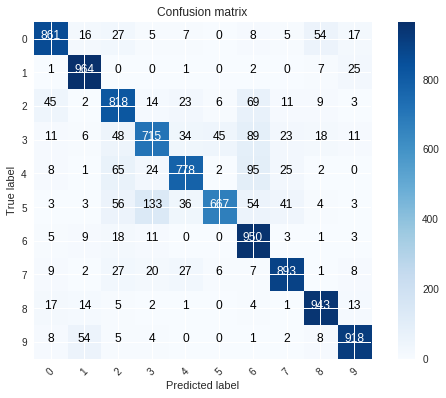

In [16]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


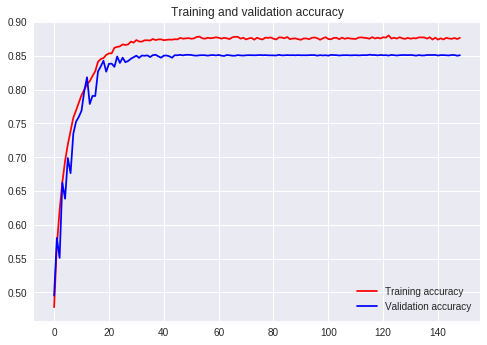

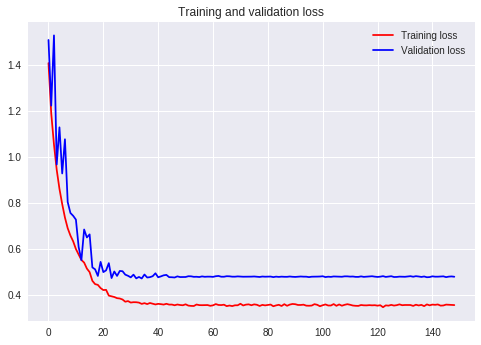

In [17]:
print(history.history.keys())
accuracy = history.history['acc'][1:]
val_accuracy = history.history['val_acc'][1:]
loss = history.history['loss'][1:]
val_loss = history.history['val_loss'][1:]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


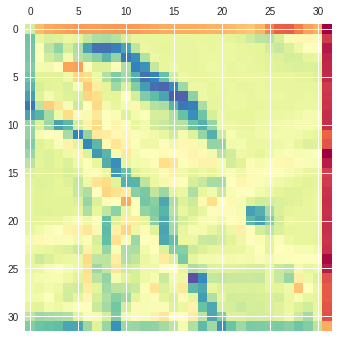

In [79]:
from keras import models
test_im = x_train[800]
layer_outputs = [layer.output for layer in model.layers[:12]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,32,32,3))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='Spectral')

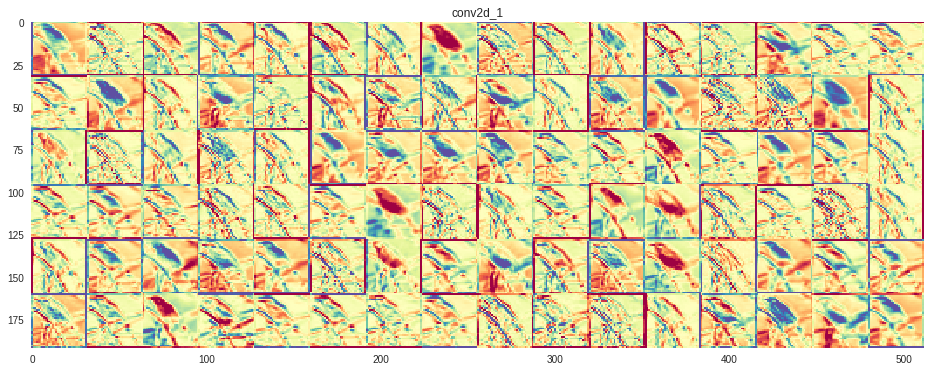

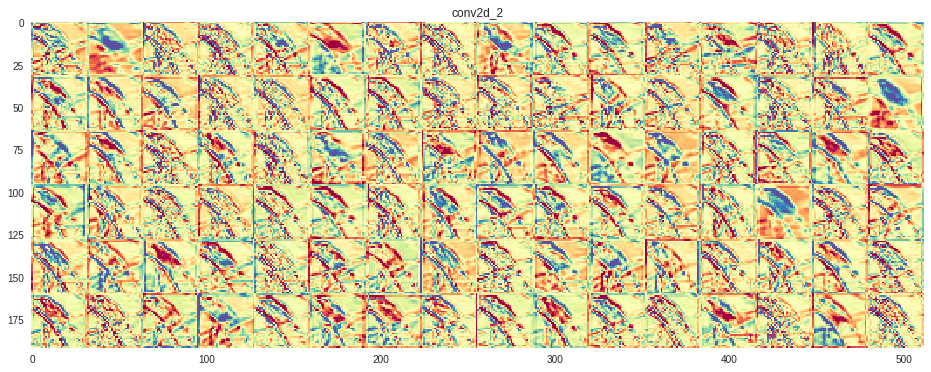

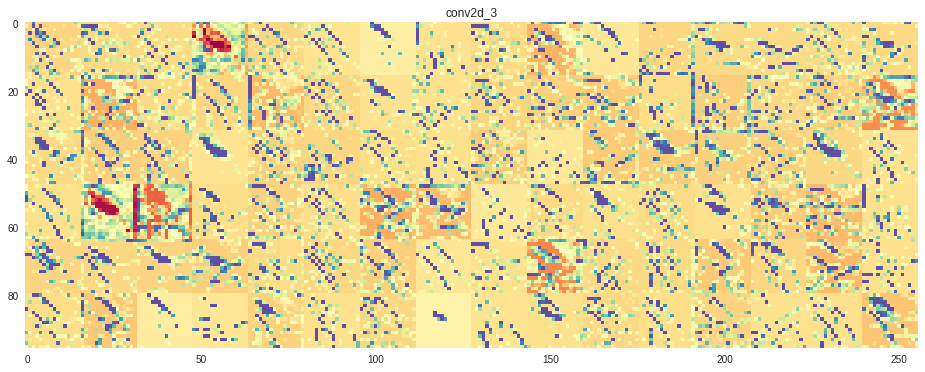

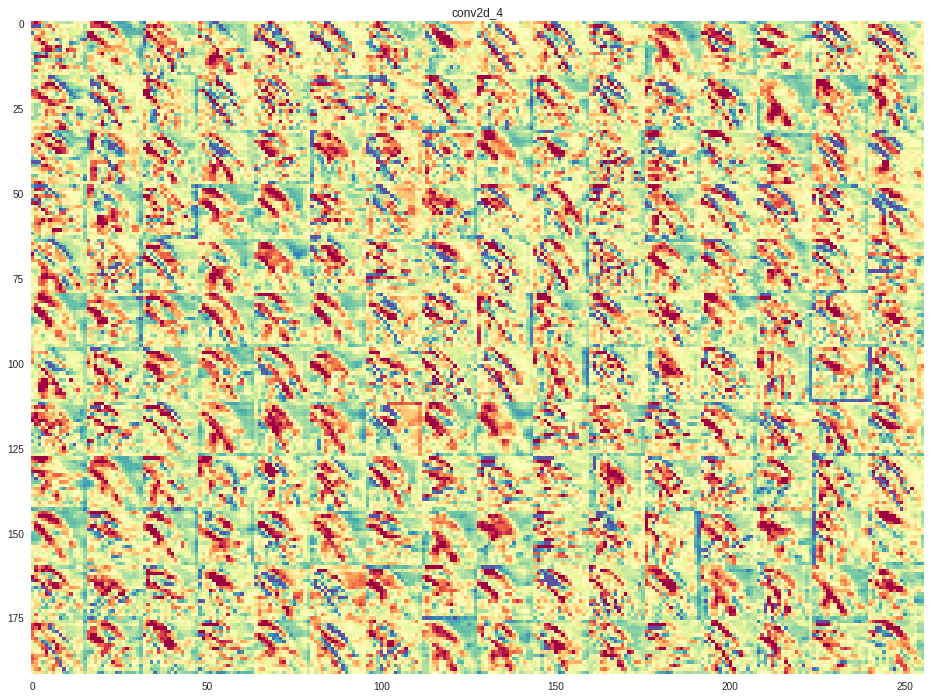

In [80]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='Spectral')

In [77]:
test_im = x_train[800]
layer_outputs = [layer.output for layer in model.layers[-16:-12]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


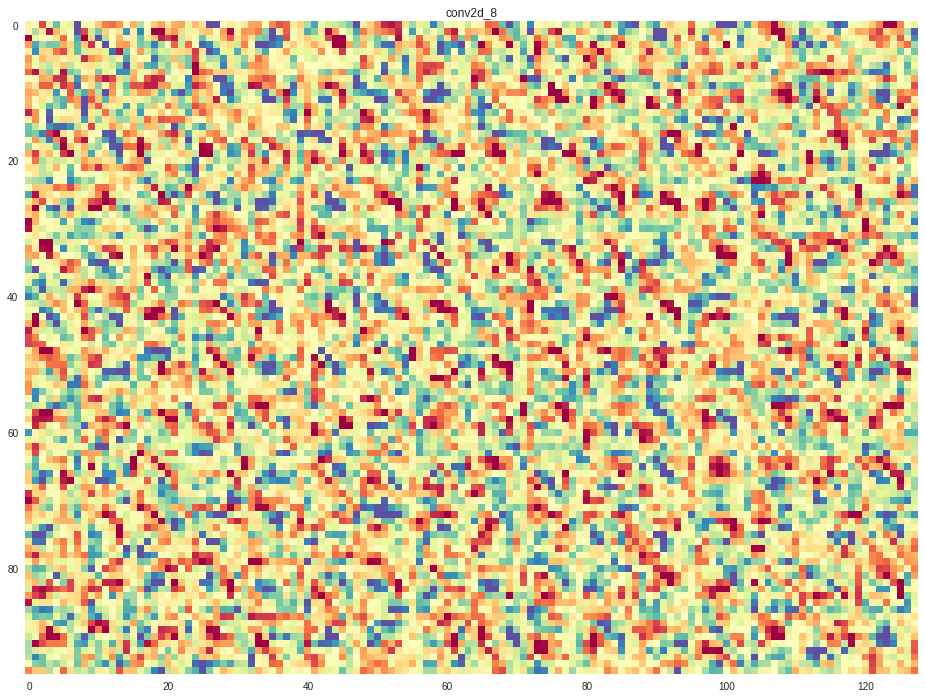

In [78]:
layer_names = []
for layer in model.layers[-16:-12]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='Spectral')